## 19.1 Introduction
C, at its core, provides support for three fundamental types of data: integers, characters, and floating point values.

As we traversed the topics in
the second half of this textbook, we saw the need for extending these basic types
to include pointers and arrays. Both pointers and arrays are derived from the three
fundamental types. Pointers point to one of the three types; we can declare arrays
of int, char, or double. 

Ultimately, though, the job of the programmer is to write programs that deal with real-world objects

The problem lies in the reality that integers, characters, and floating point values are the only things that the underlying computing system can deal with. The programmer must map these real-world objects onto these primitive types, which can be burdensome. But the programming language can assist in making that bridge. Providing support for describing real-world objects and specifying operations upon them is the basis for **object orientation**

We take a small step toward object orientation in this chapter by examining how a C programmer can build a type that is a combination of the more basic types. This aggregation is called a **structure** in C

Structures provide the programmer with a convenient way of representing objects that are
best represented by multiple values. For example, an employee might be represented as a structure containing a name (character string), job title (character
string), department (perhaps integer), and employee ID (integer) within a corporate database program. In devising such a database program we might use a C
structure. 

The main theme of this chapter is C's support for advanced data structures

## 19.2 Structures 
Some things are best described by an aggregation of fundamental types.

Structures allow the programmer to define a new type that consists of a combination of fundamental
data items such as int, char, and double, as well as pointers to them and
arrays of them

Structure variables are declared in the same way variables of
fundamental data types are declared. Before any structure variables are declared,
however, the organization and naming of the data items within the structure must
be defined. 

**Eg:** Following are the variable declarations for describing a single aircraft in flight. 

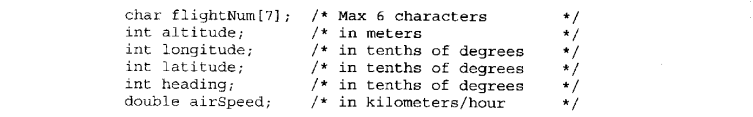

If the program modeled multiple flights, we would need to declare a copy of these variables for each one, which is tedious and could result in excessively long code. C provides a convenient way to aggregate these characteristics into a single type via the `struct` construct, as follows:

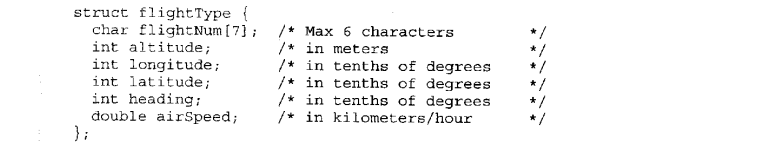

In the preceding declaration, we have created a new type containing six
member elements. We have not yet declared any storage; rather we have indicated
to the compiler the composition of this new type. We have given the structure the
tag f lightType, which is necessary for referring to the structure in other parts
of the code.

To declare a variable of this new type, we do the following: `struct flightType plane;`
- This declares a variable called plane that consists of the six fields defined in the structure declaration but otherwise gets treated like any other variable.

We can access the individual members of this structure variable using the following syntax:
    
    struct flightType plane;
    
    plane.airspeed = 800.00;
    plane.altitude = 10000;

Each member can be accessed using the variable's name as the base name followed by a dot . followed by the member name. 

The variable declaration plane gets allocated onto the stack if it is a local
variable and occupies a contiguous region of memory large enough to hold all
member elements. In this case, if each of the fundamental types occupies one
LC-3 memory location, the variable plane would occupy 12 locations.

The allocation of the structure is straightforward. A structure is allocated
the same way a variable of a basic data type is allocated: locals (by default)
are allocated on the run-time stack, and globals are allocated in the global data
section

Figure 19.1 shows a portion of the run-time stack when a function that contains the following declarations is invoked.
    
    int x;
    struct airplaneType plane;
    int y;

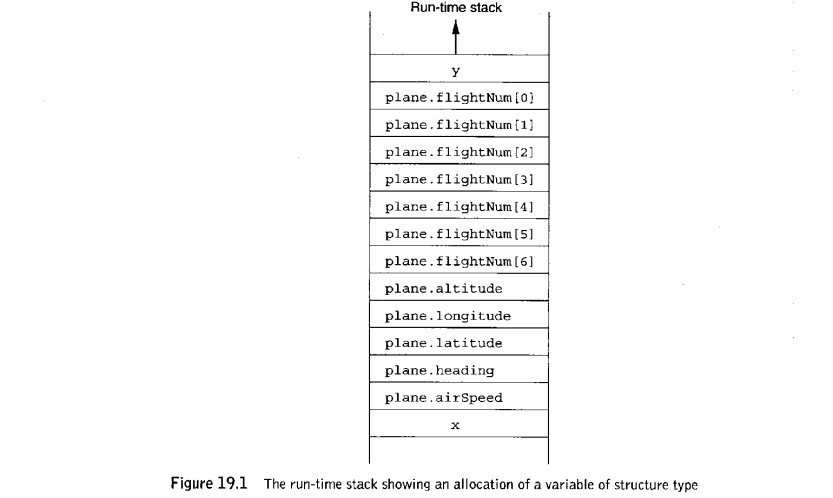

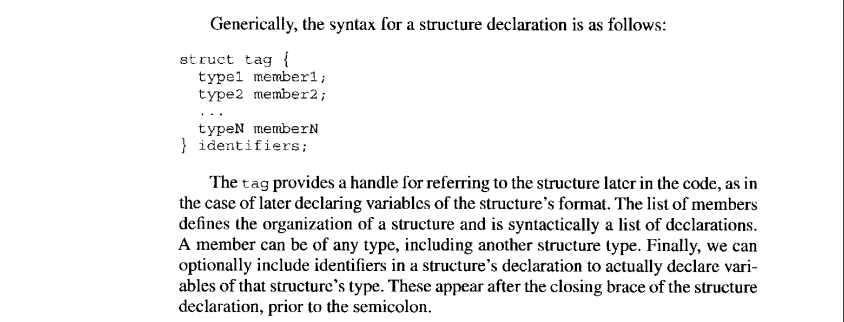

## 19.2.1 typedef 
**C structures enable programmers to define their own types**

C typedef allows programmers to name their own types. It has the general form 

    `typedef type name;`

This statement causes the identifier name to be synonymous with the type type, which can be any basic type or aggregate type (e.g., a structure). So for instance,

    `typedef int Color;` 
    
allows us to define variables of type Color, which will now be synonymous with integer.

### 19.2.2 Implementing Structures in C 
Now that we have seen the technique for declaring and allocating variables of structure type (and have given them new type names), we focus on accessing the member fields and performing operations on them. 

Eg: in the following code, the member altitude of the structure variable of type Flight is accessed. 

    int x ;
    Flight plane;
    int y;
    plane.altitude = 0;

Here, the variable plane is of type Flight, meaning it contains the six member fields we defined previously.

## 19.3 Arrays of Structures 
Let's say we are writing a piece of software to determine if any flights over the skies of Chicago are in danger of colliding. For this program, we will use the Flight type that we previously defined. 

If the maximum number of flights that will ever simultaneously exist in this airspace is 100 planes, then the following declaration is appropriate:

    Flight planes[100];

This declaration is similar to the simple declaration `int d[100]`, except instead of declaring 100 integer values, we have declared a contiguous region of memory containing 100 structures, each of which is composed of the six members indicated in the declaration `struct flightType`

The reference planes [123, for example, would refer to the thirteenth object in the region of 100 such objects in memory.

Each object contains enough storage for its six constituent member elements. 

Accessing a member field is done by accessing an element of the array and then specifying a field: `plane[0].heading`

**Eg:**

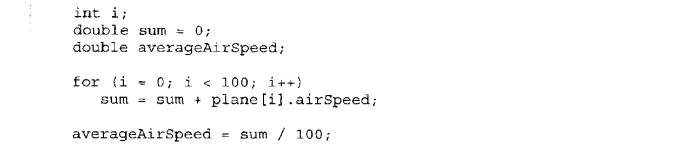

    Flight *planePtr; 

    planePtr = &plane[34]; 

    (*planePtr).longitude 

The previous expression is equivalent to

    planePtr->longitude 

While it is possible to pass structures, passing pointers is likely to be more efficient because it involves less pushing of data onto the run-time stack; that is, in this case two pointers are pushed rather than 24 locations' worth of data for two objects of type Flight

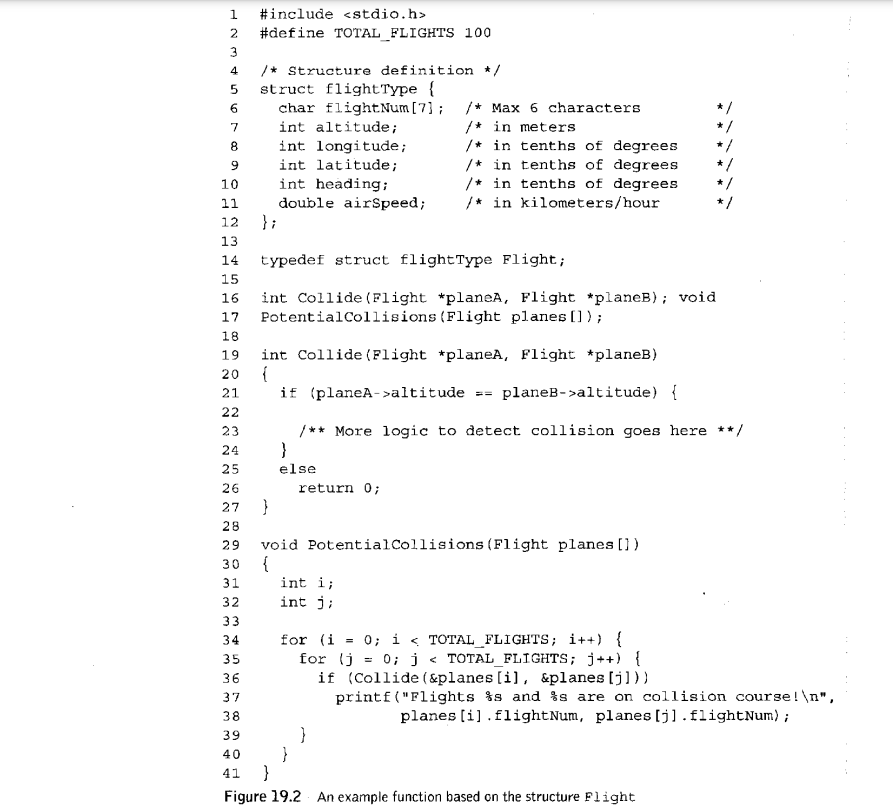



## 19.4 Dynamic Memory Allocation 
**Memory objects (e.g., variables) in C programs are allocated to one of three spots in memory:**
1. the run-time stack
2. global data section
3. the heap

- Variables declared **local** to functions are allocated during execution onto the **run-time stack** by default. 
- **Global** variables are allocated to the **global data section** and are accessible by all parts of a program. 
- **Dynamically allocated data objects** - objects that are created during run-time - are allocated onto the **heap**.

Eg: to dynamically adapt the size of the array based on the number of planes in the air. To accomplish this, we rely on the concept of dynamic memory allocation

**In a nutshell, dynamic memory allocation works as follows: A piece of code called the memory allocator manages an area of memory called the heap.**

Figure 19.3 shows the relationship of the various regions of memory, including the heap. 
- During execution, a program can make requests to the memory allocator for contiguous pieces of memory of a particular size.
- The memory allocator then reserves this memory and returns a pointer to the newly reserved memory to the program

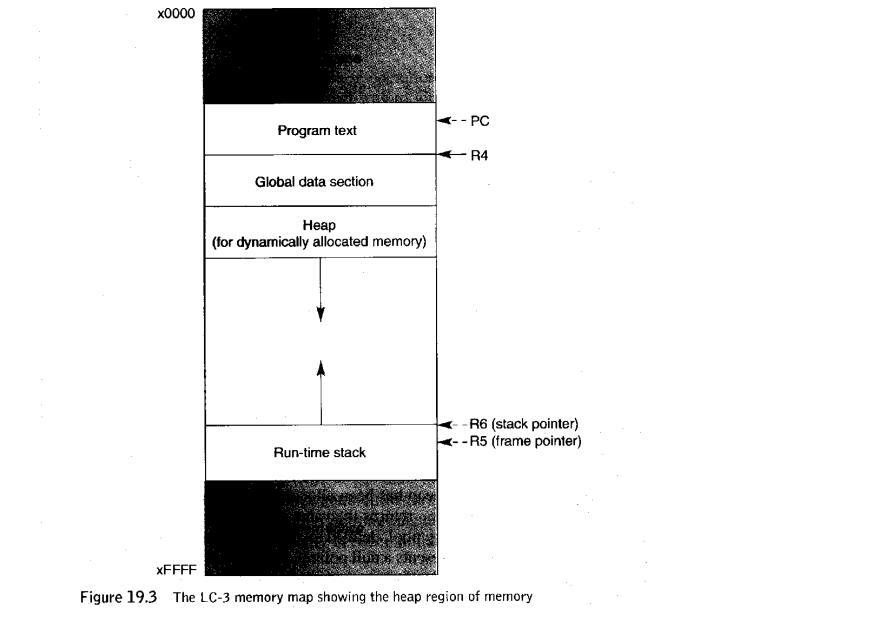

For example, if we wanted to store 1,000 flights' worth of data in our air traffic control program, we could request the allocator for this space. If enough space exists in the heap, the allocator will return a pointer to it.

Notice that the heap and the stack both grow toward each other. The size of the stack is based on the depth of the current function call, whereas the size of the heap is based on how much memory the memory allocato has reserved for the requests it has received.


### 19.4.1 Dynamically Sized Arrays 
Dynamic allocation in C is handled by the C standard library functions. 

In particular, the memory allocator is invoked by the function `malloc`

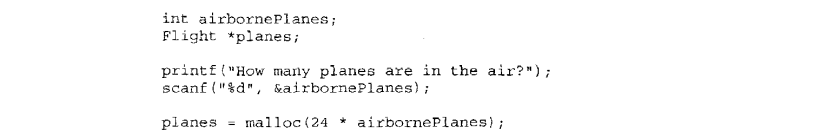

Here we allocate a chunk of memory consisting of 24 * airbornePlane bytes, where airbornePlanes is the number of planes in the air as indicated by the user.

What about the 24? Recall that the type Flight is composed of six
members—an array of 7 characters, 4 integers, and a double, each occupy a single
two-byte location on the LC-3. Each structure requires 24 bytes of memory.

As a necessary convenience for programmers, the C language supports a compile-time operator called `sizeof`

This operator returns the size, in bytes, of the memory object or type passed to it as an argument. For example, sizeof(Flight) will return the number of bytes occupied by a variable of type Flight, or 24

**Other Memory Allocation Functions:**
- `calloc`: Allocates memory and initializes it to 0.
- `realloc`: Adjusts the size of previously allocated memory.
    - Use cases: Dynamic resizing of arrays, e.g., writing functions like AddPlane() or DeletePlane()
 
**Required Header:** Include stdlib.h to use memory allocation functions (malloc, calloc, realloc, free).

## 19.5 Linked Lists 
fundamental data structure that is pervasive in computing. 

A linked list is similar to an array in that both can be used to store data that is best represented as a list of elements. 
- In an array, each element (except the last) has a next element that follows it sequentially in memory.
- Likewise **in a linked list, each element has a next element, but the next element need not be sequentially adjacent in memory. Rather, each element contains a pointer to the next element**. 


**a collection of nodes, where each node is one "unit" of data**, such as the characteristics of an airborne aircraft from the previous section.

**we connect these nodes together using pointers.**

Each node contains a pointer element that points to the next node in the list.

Given a starting node, we can go from one node to another by following the pointer in each node

To create these nodes, we rely on C structures. A critical element for the structure that defines the nodes of a linked list is that it contains a member element that points to nodes like itself.

**Eg:** Notice that we have added a new member element to the structure definition. It is a pointer to a node of the same type. 

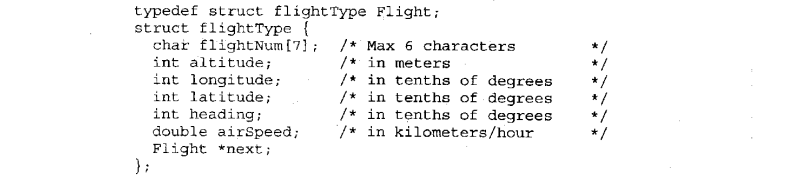

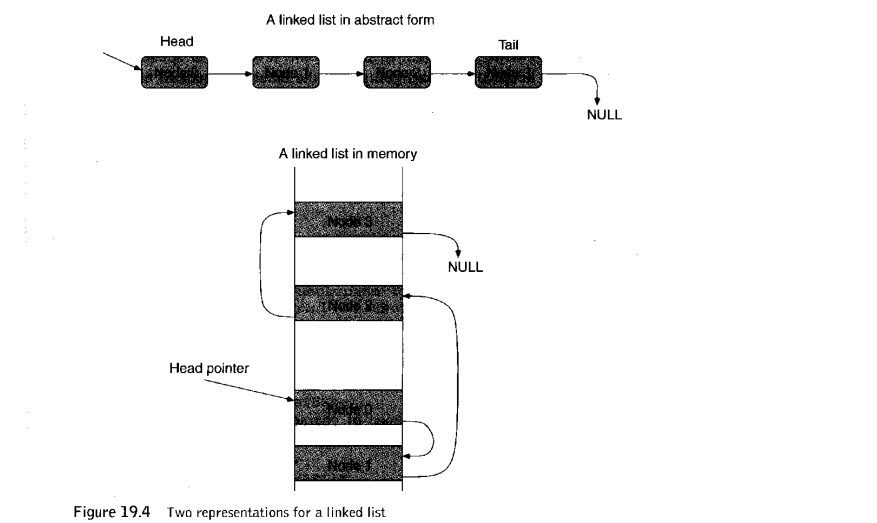

Like an array, a linked list has a beginning and an end. Its beginning, or head, is accessed using a pointer called the **head pointer**

The final node in the list, or tail, points to the NULL value.

Despite their similarities, arrays and linked lists have fundamental differences. 
An array can be accessed in random order.  We can access element number 4, followed by element 911, followed by 45, for example. 
A simple linked list must be traversed sequentially starting at its head

But linked lists are dynamic in nature; additional nodes can be added
or deleted without movement of the other nodes. While it is straightforward to
dynamically size an array (see Section 19.4.1 on using malloc), it is much more
costly to remove a single element in an array, particularly if it lies in the middle. 

**With a linked list we can dynamically add nodes to make room for more data, and we can delete nodes that are no longer required.**

**Advantages of Linked Lists**
Dynamic Size: The list grows and shrinks as items are added or removed.
Efficient Insertion/Deletion: Direct pointer manipulation avoids the need to shift elements.
Sorted Order Maintenance: Ensures quick lookup for queries.

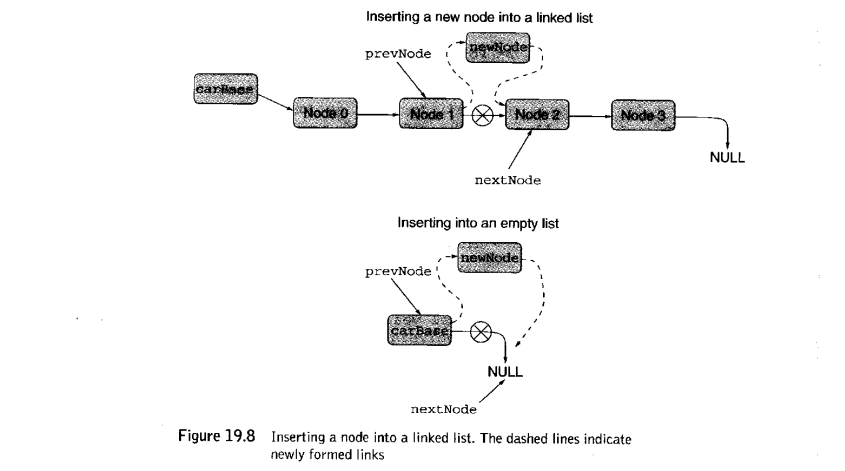

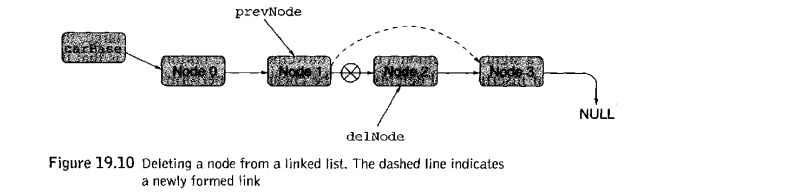

Deleting a Node:
- Process:
    - Use pointer manipulation to remove a node from the linked list.
    - Deallocate memory for the node using the free function, returning it to the heap.
- Advantages Over Arrays:
    - In linked lists, deletion involves adjusting a few pointers, irrespective of the list size.
    - In arrays, deleting an element requires shifting all subsequent elements, which can be computationally expensive for large arrays.

---
**ASIDE:** calloc vs malloc

Malloc allocates only the requested memory block of memory. Calloc allocates memory according to the specified number of blocks of memory of a specific type. In malloc, the memory block is uninitialized and contains garbage values. In calloc, the memory block is initialized with zero.

---

## 19.6 Summary

##### 1. Structures in C
- C structures allow grouping of different primitive data types into user-defined aggregate types.
- They provide a basic form of object orientation, enabling programs to focus on real-world objects rather than primitive types.

##### 2. Dynamic Memory Allocation
- Enables creation of data structures that grow or shrink during execution.
- C offers standard functions like `malloc`, `calloc`, `realloc`, and `free` to manage dynamic memory.

##### 3. Linked Lists
- A dynamic data structure combining structures and dynamic memory allocation.
- Unlike arrays, linked lists can adjust their size during execution, making them efficient for certain applications.
- The use of pointers to connect data elements is fundamental and forms the basis for more advanced structures like hash tables, trees, and graphs.

These concepts together lay the groundwork for building flexible and efficient data structures.
